In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
from scipy.stats import chi2
import scipy.optimize as spo

import os
import os.path as path
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')

!rm Data/Minimos.dat

file = 'Data/Minimos.dat'


#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Exponencial.dat'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [................................................................................] 1025 / 1025File loaded


In [50]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
N = len(x)

sigma = np.random.normal(loc=0,scale=10,size=N)
sigma = np.abs(sigma)
print(sigma)

[ 2.87023182  8.55661144  0.79691416  4.3479544   5.62273815  5.31176612
 11.92628121 18.75759582  1.84197505  5.96670404  8.58695064  0.57941421
  2.78085567 20.12309041  0.93334035  2.04168042 16.63118783 11.61206308
  4.17495112 12.60025344  6.09136075  7.30474948  6.05786784 15.91862182
  6.0361259   0.81416496  0.91678872  5.04763581  4.98191542 13.35402044]


<ErrorbarContainer object of 3 artists>

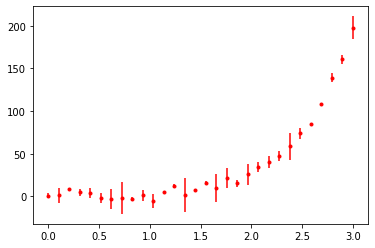

In [51]:
plt.errorbar(x,y,yerr=sigma,fmt='.',color='r')

In [52]:
# Definimos el modelo con sus parametros
def GetModel1(x,p):
    
    y = 0.
    for n in range(len(p)):
        y += p[n]*x**n
    
    return y

In [53]:
def GetModel2(x,p):
    
    A,B,C = p
   # C  = 0.
    return A*np.exp(B*x)+C

In [54]:
def Chi2(p,x,y,sigma,Model):
    return np.sum( ( ( y - Model(x,p) )/sigma )**2  + np.log(sigma) ) 

In [55]:
#primer modelo
p0 = np.ones(8)
nll = lambda *p: Chi2(*p)

In [56]:
result = spo.minimize( nll, p0, args=(x,y,sigma,GetModel1), options={"disp":True},method='Nelder-mead')

Optimization terminated successfully.
         Current function value: 138.084835
         Iterations: 818
         Function evaluations: 1281


In [57]:
if result.success:
    print('Success!')
    print(f"x={result.x} y = {result.fun}")
else:
    print('could not find a minimum')
    print(f"x={result.x} y = {result.fun}")

Success!
x=[  5.86386629  -2.39754545  13.28924336 -10.22850013  -4.28093043
   6.13101328  -1.54317574   0.15336758] y = 138.08483491946677


In [58]:
param = result.x

In [59]:
ObsChi2 = Chi2(param,x,y,sigma,GetModel1)
ObsChi2

138.08483491946677

In [60]:
def Chi2Reducido(p,Model):
    return Chi2(p,x,y,sigma,Model)/(N-len(p))

In [61]:
Chi2R = Chi2Reducido(param,GetModel1)
Chi2R

6.276583405430308

In [62]:
#segundo modelo
p0 = np.ones(3)
nll = lambda *p: Chi2(*p)
result1 = spo.minimize( nll, p0, args=(x,y,sigma,GetModel2), options={"disp":True})

         Current function value: 141.745836
         Iterations: 49
         Function evaluations: 324
         Gradient evaluations: 81


In [63]:
param1 = result1.x
ObsChi2 = Chi2(param1,x,y,sigma,GetModel2)
ObsChi2

141.74583566756104

In [64]:
Chi2RE = Chi2Reducido(param1,GetModel2)
Chi2RE

5.249845765465223

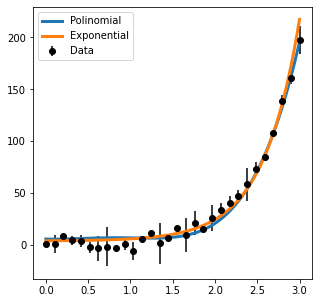

In [65]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')

t = np.linspace(np.min(x),np.max(x),100)
ax.plot(t,GetModel1(t,param),lw=3,label='Polinomial')
ax.plot(t,GetModel2(t,param1),lw=3,label='Exponential')
ax.legend()

In [66]:
#df = N - len(param)
#df

In [67]:
#CriChi2 = chi2.ppf(0.975,df=df)
#print(CriChi2)

In [68]:
#_x = np.linspace(0,100,100)
#_y = chi2.pdf(_x,df=df)
#plt.plot(_x,_y)

#plt.axvline(x=CriChi2,color='r')
#plt.axvline(x=ObsChi2,color='k')

In [69]:
Chi2V = []
npfit = []

nparams = 15

for i in range(2,nparams):
    
    p0 = np.ones(i)
    result = spo.minimize( nll, p0, args=(x,y,sigma,GetModel1), options={"disp":True},method='Nelder-Mead')
    
    if result.success:
        
    
        param = result.x
    
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.errorbar(x,y,yerr=sigma,fmt='o',color='r',label='Data')

        t = np.linspace(np.min(x),np.max(x),100)
        ax.plot(t,GetModel1(t,param),lw=3,label='Polinomio_{}'.format(i))
        ax.legend()
    
        plt.savefig('Ajuste_%.0f.jpg' %(i))
        plt.close()
    
        Chi2V.append( Chi2Reducido(param,GetModel1) )
        npfit.append(i)

Optimization terminated successfully.
         Current function value: 4099.475629
         Iterations: 69
         Function evaluations: 130
Optimization terminated successfully.
         Current function value: 365.657419
         Iterations: 148
         Function evaluations: 262
Optimization terminated successfully.
         Current function value: 161.917135
         Iterations: 324
         Function evaluations: 550
Optimization terminated successfully.
         Current function value: 118.528500
         Iterations: 605
         Function evaluations: 991
Optimization terminated successfully.
         Current function value: 138.084835
         Iterations: 818
         Function evaluations: 1281
Optimization terminated successfully.
         Current function value: 118.419844
         Iterations: 1114
         Function evaluations: 1664
Optimization terminated successfully.
         Current function value: 350.997614
         Iterations: 963
         Function evaluations: 1455
Op

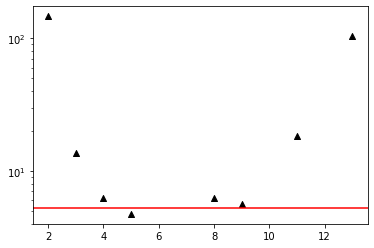

In [70]:
plt.scatter(npfit,np.array(Chi2V),color='k',marker='^')
plt.axhline(y=Chi2RE,color='r')
plt.yscale('log')

In [71]:
Chi2V

[146.40984389626973,
 13.542867376864532,
 6.2275821009825325,
 4.741140006631325,
 6.276583405430308,
 5.6390401884511965,
 18.473558630889123,
 103.53392498675824]

In [72]:
Chi2RE

5.249845765465223